In [1]:
fname = 'AMRC.svg'
from svgpathtools import svg2paths2, wsvg
paths, attributes, svg_attributes = svg2paths2(fname)

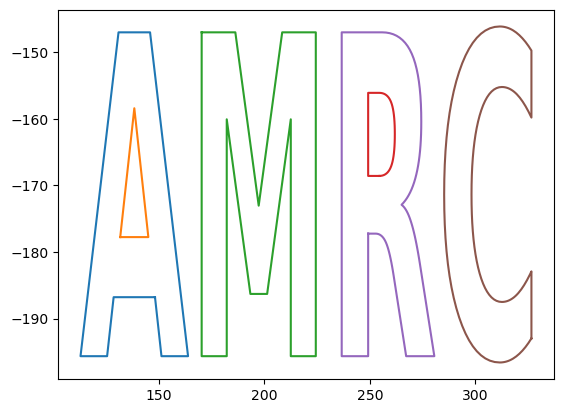

In [2]:
import svgpathtools
from matplotlib import pyplot as plt
seqs = [ ]
divs = 10
for q in paths[:-1]:
    for b in q:
        if len(seqs) == 0 or abs(seqs[-1][-1] - b.point(0)) > 0.01:
            seqs.append([b.point(0)])
        if type(b) != svgpathtools.path.Line:
            for i in range(1, divs):
                seqs[-1].append(b.point(i/divs))
        seqs[-1].append(b.point(1))

for seq in seqs:
    plt.plot([p.real  for p in seq], [-p.imag  for p in seq])

Text(0.5, 1.0, 'Test splines withrot8f')

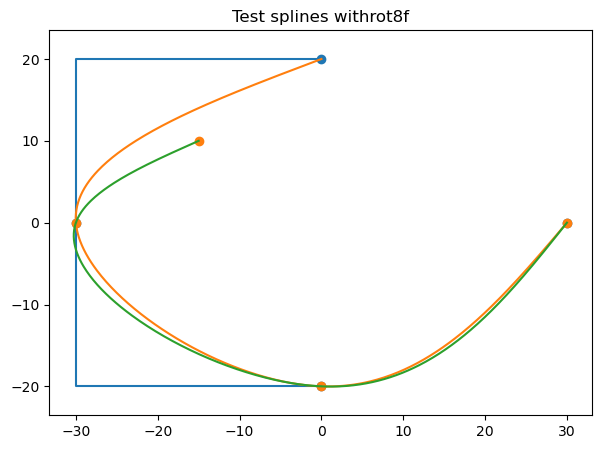

In [196]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot([0,-30,-30,0], [20,20,-20,-20]);

# Define some points:
for lam in [0, 0.5]:
    points = np.array([[-lam*30, -30, 0, 30 ],
                       [20*(1-lam), 0, -20, 0 ]]).T  # a (nbre_points x nbre_dim) array
    plt.scatter(*points.T);
    distance = np.cumsum( np.sqrt(np.sum( np.diff(points, axis=0)**2, axis=1 )) )
    distance = np.insert(distance, 0, 0)
    alpha = np.linspace(0, distance[-1], 475)
    interpolator = scipy.interpolate.CubicSpline(distance, points, axis=0, bc_type='natural', extrapolate=None)

    # interpolator = scipy.interpolate.Akima1DInterpolator(distance, points, axis=0)  # awful
    # other cubic interpolators https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html
    #interpolator = scipy.interpolate.PchipInterpolator(distance, points, axis=0, extrapolate=None)
    
    
    curve = interpolator(alpha)
    plt.plot(*curve.T[:2], '-', label='cubic');

#plt.xlim(-33,-29); plt.ylim(-5,5)
plt.axis('equal');
plt.title("Test splines withrot8f")


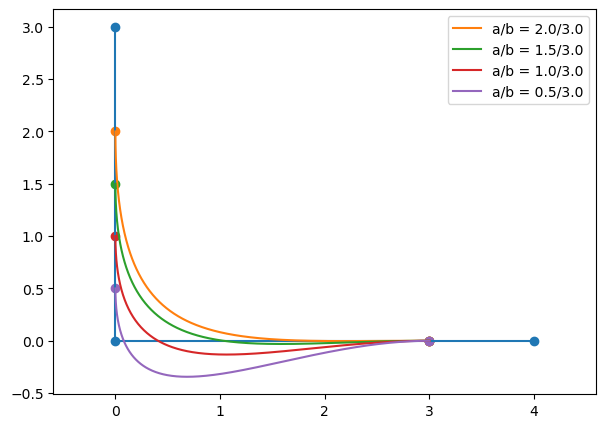

In [140]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
a, b = 2, 3
l = 1
points = np.array([[0,0,b+l],
                   [a+l,0,0]]).T
plt.plot(*points.T);
plt.scatter(*points.T)
for a in [2, 1.5, 1, 0.5]:
    points = np.array([[0,b],
                       [a,0]]).T

    distance = np.cumsum( np.sqrt(np.sum( np.diff(points, axis=0)**2, axis=1 )) )
    distance = np.insert(distance, 0, 0)
    weight = distance[-1]/2
    alpha = np.linspace(0, distance[-1], 475)
    interpolator = scipy.interpolate.CubicSpline(distance, points, axis=0, 
                    bc_type=[(1, (0, -weight)), (1, (weight, 0))], extrapolate=None)
    curve = interpolator(alpha)
    plt.scatter(*points.T)
    plt.plot(*curve.T, label="a/b = %.1f/%.1f" % (a, b));
    plt.axis('equal');
    plt.legend()


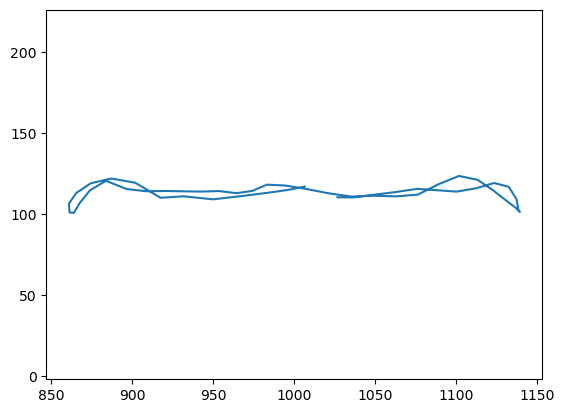

In [162]:
PTH = """SLIN {X  -110.261, Y +1026.607, E1   -30.268, E3   +64.219}
HALT
SPLINE
SPL {X  -110.147, Y +1036.670, E1   -30.888, E3   +73.218}
SPL {X  -111.738, Y +1048.599, E1   -31.683, E3   +83.712}
SPL {X  -113.441, Y +1062.224, E1   -32.695, E3   +95.246}
SPL {X  -115.435, Y +1075.854, E1   -33.104, E3  +106.846}
SPL {X  -114.622, Y +1087.749, E1   -31.815, E3  +118.202}
SPL {X  -113.749, Y +1100.211, E1   -31.825, E3  +129.364}
SPL {X  -115.776, Y +1112.078, E1   -32.525, E3  +139.340}
SPL {X  -119.049, Y +1123.395, E1   -34.346, E3  +147.520}
SPL {X  -116.719, Y +1132.353, E1   -32.342, E3  +156.096}
SPL {X  -109.244, Y +1137.089, E1   -24.755, E3  +166.573}
SPL {X  -102.318, Y +1138.374, E1   -15.752, E3  +178.808}
SPL {X  -101.246, Y +1139.200, E1   -10.125, E3  +191.605}
SPL {X  -103.652, Y +1136.777, E1    -3.137, E3  +204.868}
SPL {X  -108.158, Y +1130.911, E1    +5.157, E3  +217.406}
SPL {X  -114.498, Y +1122.749, E1   +13.365, E3  +228.379}
SPL {X  -121.016, Y +1113.213, E1   +20.615, E3  +237.825}
SPL {X  -123.401, Y +1101.603, E1   +28.722, E3  +245.387}
SPL {X  -118.273, Y +1088.923, E1   +33.898, E3  +253.124}
SPL {X  -111.891, Y +1076.287, E1   +34.446, E3  +262.663}
SPL {X  -110.809, Y +1063.077, E1   +33.857, E3  +273.740}
SPL {X  -111.230, Y +1048.999, E1   +33.874, E3  +285.490}
SPL {X  -110.686, Y +1035.024, E1   +33.661, E3  +297.505}
SPL {X  -112.804, Y +1020.647, E1   +34.357, E3  +309.173}
SPL {X  -115.456, Y +1006.957, E1   +34.675, E3  +320.224}
SPL {X  -117.514, Y  +994.302, E1   +34.579, E3  +330.469}
SPL {X  -118.038, Y  +983.091, E1   +33.860, E3  +339.908}
SPL {X  -114.179, Y  +974.055, E1   +31.548, E3  +349.003}
SPL {X  -112.777, Y  +964.372, E1   +31.794, E3  +357.348}
SPL {X  -114.085, Y  +953.496, E1   +33.062, E3  +365.855}
SPL {X  -113.769, Y  +942.701, E1   +33.110, E3  +374.917}
SPL {X  -113.917, Y  +931.736, E1   +33.183, E3  +384.111}
SPL {X  -114.130, Y  +920.392, E1   +33.368, E3  +393.511}
SPL {X  -113.970, Y  +908.649, E1   +33.504, E3  +403.225}
SPL {X  -115.348, Y  +896.464, E1   +34.318, E3  +412.665}
SPL {X  -120.413, Y  +883.714, E1   +37.556, E3  +420.244}
SPL {X  -114.502, Y  +873.827, E1   +33.039, E3  +430.514}
SPL {X  -106.458, Y  +867.372, E1   +25.631, E3  +442.625}
SPL {X  -100.553, Y  +863.896, E1   +17.660, E3  +456.850}
SPL {X  -100.909, Y  +861.297, E1   +12.655, E3  +471.433}
SPL {X  -106.292, Y  +860.860, E1    +7.898, E3  +484.713}
SPL {X  -112.881, Y  +865.371, E1    -0.942, E3  +496.573}
SPL {X  -118.868, Y  +874.359, E1   -12.285, E3  +506.993}
SPL {X  -121.846, Y  +886.951, E1   -23.556, E3  +516.330}
SPL {X  -119.214, Y  +901.812, E1   -32.470, E3  +524.869}
SPL {X  -109.959, Y  +917.403, E1   -37.051, E3  +533.905}
SPL {X  -110.843, Y  +931.691, E1   -36.063, E3  +545.236}
SPL {X  -108.977, Y  +949.940, E1   -36.889, E3  +558.594}
SPL {X  -111.086, Y  +968.249, E1   -37.491, E3  +572.092}
SPL {X  -113.101, Y  +984.135, E1   -37.027, E3  +584.413}
SPL {X  -114.885, Y  +996.702, E1   -35.999, E3  +594.665}
SPL {X  -116.877, Y +1006.362, E1   -35.597, E3  +602.305}
ENDSPLINE
SPL {X...  -110.261, Y +1026.607, E1   -30.268, E3  +623.346}
"""
import re
rpth = re.findall("X\s*([\-+.\d]+),\s*Y\s*([\-+.\d]+)", PTH)
points = np.array([ list(map(float, l))  for l in rpth ])
plt.plot(points.T[1], -points.T[0])
plt.axis('equal');


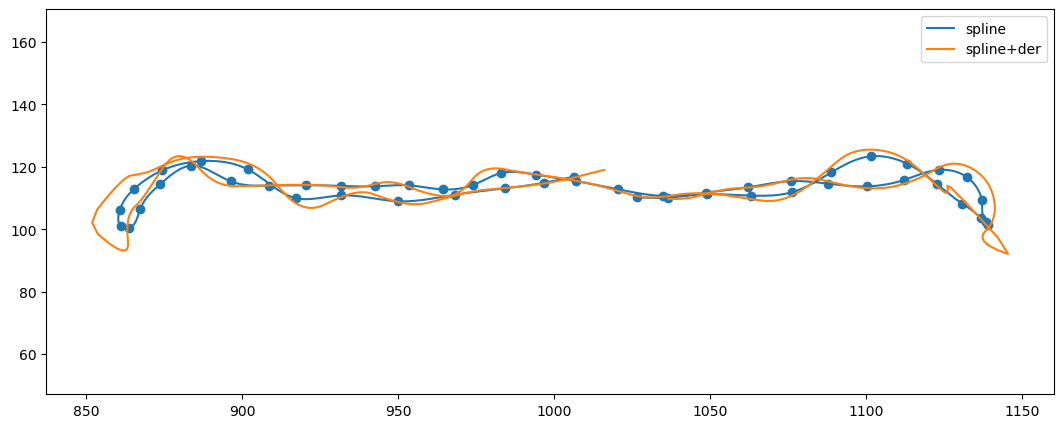

In [180]:
plt.figure(figsize=(13,5))
plt.scatter(points.T[1], -points.T[0])
distance = np.cumsum( np.sqrt(np.sum( np.diff(points, axis=0)**2, axis=1 )) )
distance = np.insert(distance, 0, 0)
alpha = np.linspace(0, distance[-1], 475)
interpolator = scipy.interpolate.CubicSpline(distance, points, axis=0, bc_type='natural', extrapolate=None)
curve = interpolator(alpha)
plt.plot(curve.T[1], -curve.T[0], label='spline');

derfac = 10
dinterpolator = interpolator.derivative()
dcurve = dinterpolator(alpha)*derfac + curve
plt.plot(dcurve.T[1], -dcurve.T[0], label='spline+der');

plt.axis('equal');
plt.legend()


ValueError: x and y should have a same length

In [201]:
len(distance), len(points)

(4, 4)

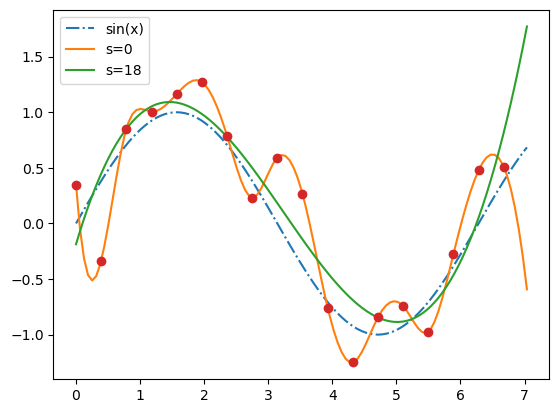

In [202]:
import numpy as np
from scipy.interpolate import splrep, BSpline
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/16)
rng = np.random.default_rng()
y =  np.sin(x) + 0.4*rng.standard_normal(size=len(x))
tck = splrep(x, y, s=0)
tck_s = splrep(x, y, s=len(x))
import matplotlib.pyplot as plt
xnew = np.arange(0, 9/4, 1/50) * np.pi
plt.plot(xnew, np.sin(xnew), '-.', label='sin(x)')
plt.plot(xnew, BSpline(*tck)(xnew), '-', label='s=0')
plt.plot(xnew, BSpline(*tck_s)(xnew), '-', label=f's={len(x)}')
plt.plot(x, y, 'o')
plt.legend()
plt.show()

In [208]:
splrep

<function scipy.interpolate._fitpack_py.splrep(x, y, w=None, xb=None, xe=None, k=3, task=0, s=None, t=None, full_output=0, per=0, quiet=1)>